<a href="https://colab.research.google.com/github/SHIVADHARSHINI25/HTMLActorPage/blob/main/DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report


In [3]:
file_path = "/content/synthetic_personal_finance_dataset.csv"
df = pd.read_csv(file_path)

df.head()


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


(17639, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639 entries, 0 to 17638
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  17639 non-null  object 
 1   age                      17639 non-null  int64  
 2   gender                   17639 non-null  object 
 3   education_level          17639 non-null  object 
 4   employment_status        17639 non-null  object 
 5   job_title                17639 non-null  object 
 6   monthly_income_usd       17639 non-null  float64
 7   monthly_expenses_usd     17639 non-null  float64
 8   savings_usd              17639 non-null  float64
 9   has_loan                 17639 non-null  object 
 10  loan_type                7085 non-null   object 
 11  loan_amount_usd          17639 non-null  float64
 12  loan_term_months         17639 non-null  int64  
 13  monthly_emi_usd          17639 non-null  float64
 14  loan_inter

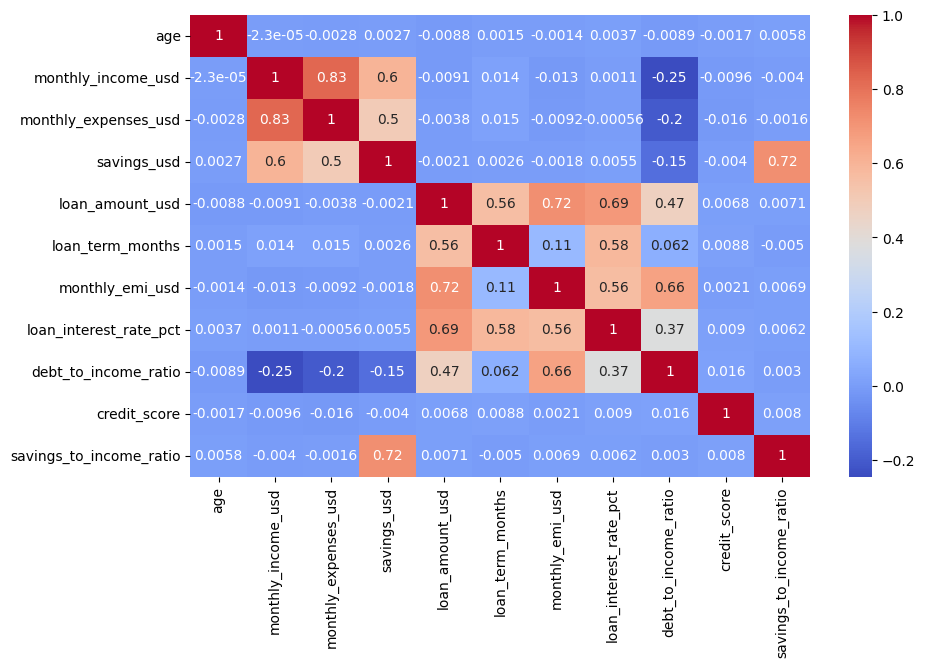

In [5]:
print(df.shape)
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [6]:
# Calculate savings = income - expenses - EMI
df["predicted_savings"] = df["monthly_income_usd"] - df["monthly_expenses_usd"] - df["monthly_emi_usd"]

# Define Financial Health
def classify_status(row):
    ratio = row["predicted_savings"] / row["monthly_income_usd"]
    if ratio > 0.3:
        return "Good"
    elif ratio >= 0.1:
        return "Average"
    else:
        return "Poor"

df["financial_status"] = df.apply(classify_status, axis=1)

df[["monthly_income_usd", "monthly_expenses_usd", "monthly_emi_usd", "predicted_savings", "financial_status"]].head()


,monthly_income_usd,monthly_expenses_usd,monthly_emi_usd,predicted_savings,financial_status
0,3531.69,1182.59,0.00,2349.10,Good
1,3531.73,2367.99,4953.50,-3789.76,Poor
2,2799.49,1003.91,0.00,1795.58,Good
3,5894.88,4440.12,4926.57,-3471.81,Poor
4,5128.93,4137.61,0.00,991.32,Average


In [7]:
# Features & Target
X_reg = df[["monthly_income_usd", "monthly_expenses_usd", "loan_amount_usd", "monthly_emi_usd", "credit_score"]]
y_reg = df["predicted_savings"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred_reg = reg_model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred_reg))
print("MAE:", mean_absolute_error(y_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))


R2 Score: 1.0
MAE: 8.049544468244258e-11
RMSE: 9.633398205519324e-11


In [8]:
# Features & Target
X_cls = df[["monthly_income_usd", "monthly_expenses_usd", "loan_amount_usd", "monthly_emi_usd", "credit_score"]]
y_cls = df["financial_status"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train Random Forest Classifier
cls_model = RandomForestClassifier(n_estimators=100, random_state=42)
cls_model.fit(X_train, y_train)

# Predictions
y_pred_cls = cls_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_cls))
print("Classification Report:\n", classification_report(y_test, y_pred_cls))


Accuracy: 0.9753401360544217
Classification Report:
               precision    recall  f1-score   support

     Average       0.96      0.93      0.95       782
        Good       0.98      0.98      0.98      1492
        Poor       0.97      0.99      0.98      1254

    accuracy                           0.98      3528
   macro avg       0.97      0.97      0.97      3528
weighted avg       0.98      0.98      0.98      3528



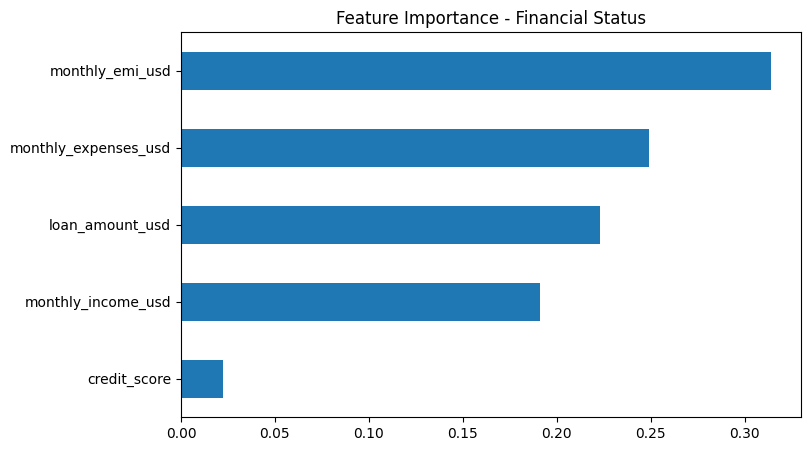

In [9]:
feat_imp = pd.Series(cls_model.feature_importances_, index=X_cls.columns)
feat_imp.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance - Financial Status")
plt.show()


In [12]:
def predict_finance(income, expenses, loan, emi, credit_score):
    # Create DataFrame with correct feature names
    input_df = pd.DataFrame([[income, expenses, loan, emi, credit_score]],
                            columns=["monthly_income_usd", "monthly_expenses_usd", "loan_amount_usd", "monthly_emi_usd", "credit_score"])

    # Regression Prediction
    savings_pred = reg_model.predict(input_df)[0]

    # Classification Prediction
    status_pred = cls_model.predict(input_df)[0]

    return savings_pred, status_pred

# Example
income = 5000
expenses = 3000
loan = 20000
emi = 400
credit_score = 720

savings, status = predict_finance(income, expenses, loan, emi, credit_score)
print(f"Predicted Monthly Savings: ${savings:.2f}")
print(f"Financial Health Status: {status}")


Predicted Monthly Savings: $1600.00
Financial Health Status: Good


In [14]:
import ipywidgets as widgets
from IPython.display import display, HTML

# Create widgets
income_widget = widgets.IntText(value=5000, description='Income ($):')
expenses_widget = widgets.IntText(value=3000, description='Expenses ($):')
loan_widget = widgets.IntText(value=20000, description='Loan ($):')
emi_widget = widgets.IntText(value=400, description='EMI ($):')
credit_widget = widgets.IntSlider(value=700, min=300, max=850, step=10, description='Credit Score:')

output = widgets.Output()

def on_predict_clicked(b):
    with output:
        output.clear_output()
        savings, status = predict_finance(
            income_widget.value,
            expenses_widget.value,
            loan_widget.value,
            emi_widget.value,
            credit_widget.value
        )

        # Styling based on status
        if status == "Good":
            color = "green"
        elif status == "Average":
            color = "orange"
        else:
            color = "red"

        # Styled HTML output
        display(HTML(f"""
        <div style="padding:15px; border-radius:10px; border:2px solid {color}; background-color:#f9f9f9; width:50%;">
            <h3 style="color:{color}; margin:0;">💰 Predicted Monthly Savings: ${savings:.2f}</h3>
            <h3 style="color:{color}; margin:0;">📊 Financial Health Status: {status}</h3>
        </div>
        """))

# Predict button
predict_button = widgets.Button(description="Predict Finance", button_style='success')
predict_button.on_click(on_predict_clicked)

# Display form
display(income_widget, expenses_widget, loan_widget, emi_widget, credit_widget, predict_button, output)


IntText(value=5000, description='Income ($):')

IntText(value=3000, description='Expenses ($):')

IntText(value=20000, description='Loan ($):')

IntText(value=400, description='EMI ($):')

IntSlider(value=700, description='Credit Score:', max=850, min=300, step=10)

Button(button_style='success', description='Predict Finance', style=ButtonStyle())

Output()

In [15]:
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

# Create widgets
income_widget = widgets.IntText(value=5000, description='Income ($):')
expenses_widget = widgets.IntText(value=3000, description='Expenses ($):')
loan_widget = widgets.IntText(value=20000, description='Loan ($):')
emi_widget = widgets.IntText(value=400, description='EMI ($):')
credit_widget = widgets.IntSlider(value=700, min=300, max=850, step=10, description='Credit Score:')

output = widgets.Output()

def draw_gauge(status):
    """Draws a financial health gauge using Matplotlib."""
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    # Remove polar labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # Gauge segments (Poor=red, Average=orange, Good=green)
    categories = ["Poor", "Average", "Good"]
    colors = ["red", "orange", "green"]

    # Angles for each segment
    angles = np.linspace(0, np.pi, len(categories)+1)

    for i in range(len(categories)):
        ax.barh(1, width=angles[i+1]-angles[i], left=angles[i], height=1, color=colors[i], alpha=0.6)

    # Needle position
    if status == "Poor":
        angle = (angles[0] + angles[1]) / 2
    elif status == "Average":
        angle = (angles[1] + angles[2]) / 2
    else:
        angle = (angles[2] + np.pi) / 2

    ax.annotate("▲", xy=(angle, 1), fontsize=30, ha="center", va="center", color="black")

    plt.title("📊 Financial Health Gauge", fontsize=14, pad=20)
    plt.show()


def on_predict_clicked(b):
    with output:
        output.clear_output()
        savings, status = predict_finance(
            income_widget.value,
            expenses_widget.value,
            loan_widget.value,
            emi_widget.value,
            credit_widget.value
        )

        # Color for status box
        if status == "Good":
            color = "green"
        elif status == "Average":
            color = "orange"
        else:
            color = "red"

        # Styled HTML output
        display(HTML(f"""
        <div style="padding:15px; border-radius:10px; border:2px solid {color}; background-color:#f9f9f9; width:50%;">
            <h3 style="color:{color}; margin:0;">💰 Predicted Monthly Savings: ${savings:.2f}</h3>
            <h3 style="color:{color}; margin:0;">📊 Financial Health Status: {status}</h3>
        </div>
        """))

        # Show gauge visualization
        draw_gauge(status)

# Predict button
predict_button = widgets.Button(description="Predict Finance", button_style='success')
predict_button.on_click(on_predict_clicked)

# Display form
display(income_widget, expenses_widget, loan_widget, emi_widget, credit_widget, predict_button, output)


IntText(value=5000, description='Income ($):')

IntText(value=3000, description='Expenses ($):')

IntText(value=20000, description='Loan ($):')

IntText(value=400, description='EMI ($):')

IntSlider(value=700, description='Credit Score:', max=850, min=300, step=10)

Button(button_style='success', description='Predict Finance', style=ButtonStyle())

Output()

In [16]:
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# History DataFrame to log predictions
history = pd.DataFrame(columns=["Income", "Expenses", "Loan", "EMI", "Credit Score", "Savings", "Status"])

# Widgets
income_widget = widgets.IntText(value=5000, description='Income ($):')
expenses_widget = widgets.IntText(value=3000, description='Expenses ($):')
loan_widget = widgets.IntText(value=20000, description='Loan ($):')
emi_widget = widgets.IntText(value=400, description='EMI ($):')
credit_widget = widgets.IntSlider(value=700, min=300, max=850, step=10, description='Credit Score:')

output = widgets.Output()

def draw_gauge(status):
    """Draws financial health gauge using Matplotlib."""
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    categories = ["Poor", "Average", "Good"]
    colors = ["red", "orange", "green"]
    angles = np.linspace(0, np.pi, len(categories)+1)

    for i in range(len(categories)):
        ax.barh(1, width=angles[i+1]-angles[i], left=angles[i], height=1, color=colors[i], alpha=0.6)

    if status == "Poor":
        angle = (angles[0] + angles[1]) / 2
    elif status == "Average":
        angle = (angles[1] + angles[2]) / 2
    else:
        angle = (angles[2] + np.pi) / 2

    ax.annotate("▲", xy=(angle, 1), fontsize=30, ha="center", va="center", color="black")
    plt.title("Financial Health Gauge", fontsize=14, pad=20)
    plt.show()

def on_predict_clicked(b):
    global history
    with output:
        output.clear_output()
        savings, status = predict_finance(
            income_widget.value,
            expenses_widget.value,
            loan_widget.value,
            emi_widget.value,
            credit_widget.value
        )

        # Color
        if status == "Good":
            color = "green"
        elif status == "Average":
            color = "orange"
        else:
            color = "red"

        # Styled result box
        display(HTML(f"""
        <div style="padding:15px; border-radius:10px; border:2px solid {color}; background-color:#f9f9f9; width:50%;">
            <h3 style="color:{color}; margin:0;">💰 Predicted Monthly Savings: ${savings:.2f}</h3>
            <h3 style="color:{color}; margin:0;">📊 Financial Health Status: {status}</h3>
        </div>
        """))

        # Update history log
        new_row = pd.DataFrame([{
            "Income": income_widget.value,
            "Expenses": expenses_widget.value,
            "Loan": loan_widget.value,
            "EMI": emi_widget.value,
            "Credit Score": credit_widget.value,
            "Savings": round(savings, 2),
            "Status": status
        }])
        history = pd.concat([history, new_row], ignore_index=True)

        # Show gauge
        draw_gauge(status)

        # Show history table
        display(HTML("<h4>📜 Prediction History</h4>"))
        display(history)

# Predict button
predict_button = widgets.Button(description="Predict Finance", button_style='success')
predict_button.on_click(on_predict_clicked)

# Display interface
display(income_widget, expenses_widget, loan_widget, emi_widget, credit_widget, predict_button, output)


IntText(value=5000, description='Income ($):')

IntText(value=3000, description='Expenses ($):')

IntText(value=20000, description='Loan ($):')

IntText(value=400, description='EMI ($):')

IntSlider(value=700, description='Credit Score:', max=850, min=300, step=10)

Button(button_style='success', description='Predict Finance', style=ButtonStyle())

Output()

In [17]:
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

# History DataFrame
history = pd.DataFrame(columns=["Income", "Expenses", "Loan", "EMI", "Credit Score", "Savings", "Status"])

# Widgets
income_widget = widgets.IntText(value=5000, description='Income ($):')
expenses_widget = widgets.IntText(value=3000, description='Expenses ($):')
loan_widget = widgets.IntText(value=20000, description='Loan ($):')
emi_widget = widgets.IntText(value=400, description='EMI ($):')
credit_widget = widgets.IntSlider(value=700, min=300, max=850, step=10, description='Credit Score:')

output = widgets.Output()

def draw_gauge(status):
    """Draws financial health gauge using Matplotlib."""
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    categories = ["Poor", "Average", "Good"]
    colors = ["red", "orange", "green"]
    angles = np.linspace(0, np.pi, len(categories)+1)

    for i in range(len(categories)):
        ax.barh(1, width=angles[i+1]-angles[i], left=angles[i], height=1, color=colors[i], alpha=0.6)

    if status == "Poor":
        angle = (angles[0] + angles[1]) / 2
    elif status == "Average":
        angle = (angles[1] + angles[2]) / 2
    else:
        angle = (angles[2] + np.pi) / 2

    ax.annotate("▲", xy=(angle, 1), fontsize=30, ha="center", va="center", color="black")
    plt.title("Financial Health Gauge", fontsize=14, pad=20)
    plt.show()

def on_predict_clicked(b):
    global history
    with output:
        output.clear_output()
        savings, status = predict_finance(
            income_widget.value,
            expenses_widget.value,
            loan_widget.value,
            emi_widget.value,
            credit_widget.value
        )

        # Color
        if status == "Good":
            color = "green"
        elif status == "Average":
            color = "orange"
        else:
            color = "red"

        # Styled result box
        display(HTML(f"""
        <div style="padding:15px; border-radius:10px; border:2px solid {color}; background-color:#f9f9f9; width:50%;">
            <h3 style="color:{color}; margin:0;">💰 Predicted Monthly Savings: ${savings:.2f}</h3>
            <h3 style="color:{color}; margin:0;">📊 Financial Health Status: {status}</h3>
        </div>
        """))

        # Update history log
        new_row = pd.DataFrame([{
            "Income": income_widget.value,
            "Expenses": expenses_widget.value,
            "Loan": loan_widget.value,
            "EMI": emi_widget.value,
            "Credit Score": credit_widget.value,
            "Savings": round(savings, 2),
            "Status": status
        }])
        history = pd.concat([history, new_row], ignore_index=True)

        # Show gauge
        draw_gauge(status)

        # Show history table
        display(HTML("<h4>📜 Prediction History</h4>"))
        display(history)

def on_download_clicked(b):
    global history
    file_name = "finance_prediction_history.csv"
    history.to_csv(file_name, index=False)
    files.download(file_name)

# Buttons
predict_button = widgets.Button(description="Predict Finance", button_style='success')
predict_button.on_click(on_predict_clicked)

download_button = widgets.Button(description="⬇️ Download History as CSV", button_style='info')
download_button.on_click(on_download_clicked)

# Display interface
display(income_widget, expenses_widget, loan_widget, emi_widget, credit_widget, predict_button, download_button, output)


IntText(value=5000, description='Income ($):')

IntText(value=3000, description='Expenses ($):')

IntText(value=20000, description='Loan ($):')

IntText(value=400, description='EMI ($):')

IntSlider(value=700, description='Credit Score:', max=850, min=300, step=10)

Button(button_style='success', description='Predict Finance', style=ButtonStyle())

Button(button_style='info', description='⬇️ Download History as CSV', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

# History DataFrame
history = pd.DataFrame(columns=["Income", "Expenses", "Loan", "EMI", "Credit Score", "Savings", "Status"])

# Widgets
income_widget = widgets.IntText(value=5000, description='Income ($):')
expenses_widget = widgets.IntText(value=3000, description='Expenses ($):')
loan_widget = widgets.IntText(value=20000, description='Loan ($):')
emi_widget = widgets.IntText(value=400, description='EMI ($):')
credit_widget = widgets.IntSlider(value=700, min=300, max=850, step=10, description='Credit Score:')

output = widgets.Output()

def draw_gauge(status):
    """Draws financial health gauge using Matplotlib."""
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    categories = ["Poor", "Average", "Good"]
    colors = ["red", "orange", "green"]
    angles = np.linspace(0, np.pi, len(categories)+1)

    for i in range(len(categories)):
        ax.barh(1, width=angles[i+1]-angles[i], left=angles[i], height=1, color=colors[i], alpha=0.6)

    if status == "Poor":
        angle = (angles[0] + angles[1]) / 2
    elif status == "Average":
        angle = (angles[1] + angles[2]) / 2
    else:
        angle = (angles[2] + np.pi) / 2

    ax.annotate("▲", xy=(angle, 1), fontsize=30, ha="center", va="center", color="black")
    plt.title("Financial Health Gauge", fontsize=14, pad=20)
    plt.show()

def on_predict_clicked(b):
    global history
    with output:
        output.clear_output()
        savings, status = predict_finance(
            income_widget.value,
            expenses_widget.value,
            loan_widget.value,
            emi_widget.value,
            credit_widget.value
        )

        # Color
        if status == "Good":
            color = "green"
        elif status == "Average":
            color = "orange"
        else:
            color = "red"

        # Styled result box
        display(HTML(f"""
        <div style="padding:15px; border-radius:10px; border:2px solid {color}; background-color:#f9f9f9; width:50%;">
            <h3 style="color:{color}; margin:0;">💰 Predicted Monthly Savings: ${savings:.2f}</h3>
            <h3 style="color:{color}; margin:0;">📊 Financial Health Status: {status}</h3>
        </div>
        """))

        # Update history log
        history.loc[len(history)] = [
    income_widget.value,
    expenses_widget.value,
    loan_widget.value,
    emi_widget.value,
    credit_widget.value,
    round(savings, 2),
    status
]


        # Show gauge
        draw_gauge(status)

        # Show history table
        display(HTML("<h4>📜 Prediction History</h4>"))
        display(history)

def on_download_clicked(b):
    global history
    file_name = "finance_prediction_history.csv"
    history.to_csv(file_name, index=False)
    files.download(file_name)

def on_clear_clicked(b):
    global history
    history = pd.DataFrame(columns=["Income", "Expenses", "Loan", "EMI", "Credit Score", "Savings", "Status"])
    with output:
        output.clear_output()
        display(HTML("<h4>🧹 History Cleared! Start fresh with new predictions.</h4>"))

# Buttons
predict_button = widgets.Button(description="Predict Finance", button_style='success')
predict_button.on_click(on_predict_clicked)

download_button = widgets.Button(description="⬇️ Download History as CSV", button_style='info')
download_button.on_click(on_download_clicked)

clear_button = widgets.Button(description="🧹 Clear History", button_style='warning')
clear_button.on_click(on_clear_clicked)

# Display interface
display(income_widget, expenses_widget, loan_widget, emi_widget, credit_widget,
        predict_button, download_button, clear_button, output)


IntText(value=5000, description='Income ($):')

IntText(value=3000, description='Expenses ($):')

IntText(value=20000, description='Loan ($):')

IntText(value=400, description='EMI ($):')

IntSlider(value=700, description='Credit Score:', max=850, min=300, step=10)

Button(button_style='success', description='Predict Finance', style=ButtonStyle())

Button(button_style='info', description='⬇️ Download History as CSV', style=ButtonStyle())

Button(button_style='warning', description='🧹 Clear History', style=ButtonStyle())

Output()

In [21]:
!pip install streamlit
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 151.6 MB/s eta 0:00:00


In [22]:
pip install pyngrok


In [29]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ---------------------------
# Sample Training Data
# ---------------------------
train_data = pd.DataFrame({
    "income": [3000, 5000, 7000, 10000, 15000],
    "expenses": [2000, 2500, 4000, 6000, 7000],
    "loan": [10000, 20000, 15000, 5000, 0],
    "emi": [200, 400, 300, 100, 0],
    "credit_score": [600, 650, 700, 750, 800],
    "savings": [1000, 2500, 3000, 4000, 8000],
    "status": ["Poor", "Average", "Good", "Good", "Good"]
})

# ---------------------------
# Train Models
# ---------------------------
X = train_data[["income", "expenses", "loan", "emi", "credit_score"]]
y_savings = train_data["savings"]
y_status = train_data["status"]

savings_model = LinearRegression().fit(X, y_savings)
status_model = RandomForestClassifier().fit(X, y_status)

# ---------------------------
# Prediction Function
# ---------------------------
def predict_finance(income, expenses, loan, emi, credit_score):
    features = np.array([[income, expenses, loan, emi, credit_score]])
    savings = savings_model.predict(features)[0]
    status = status_model.predict(features)[0]
    return savings, status

# ---------------------------
# Streamlit App UI
# ---------------------------
st.set_page_config(page_title="💰 Finance Prediction App", layout="centered")

st.title("💰 Finance Prediction App")
st.markdown("Enter your financial details below and get predictions on your **monthly savings** and **financial health status**.")

# Sidebar inputs
st.sidebar.header("User Input Parameters")
income = st.sidebar.number_input("Monthly Income ($)", min_value=0, value=5000, step=100)
expenses = st.sidebar.number_input("Monthly Expenses ($)", min_value=0, value=3000, step=100)
loan = st.sidebar.number_input("Total Loan Amount ($)", min_value=0, value=20000, step=500)
emi = st.sidebar.number_input("Monthly EMI ($)", min_value=0, value=400, step=50)
credit_score = st.sidebar.slider("Credit Score", min_value=300, max_value=850, value=700, step=10)

# Predict button
if st.sidebar.button("Predict Finance"):
    savings, status = predict_finance(income, expenses, loan, emi, credit_score)

    # Result box
    color_map = {"Good": "green", "Average": "orange", "Poor": "red"}
    st.markdown(f"""
    <div style="padding:15px; border-radius:10px; border:2px solid {color_map[status]}; background-color:#f9f9f9;">
        <h3 style="color:{color_map[status]}; margin:0;">💰 Predicted Monthly Savings: ${savings:.2f}</h3>
        <h3 style="color:{color_map[status]}; margin:0;">📊 Financial Health Status: {status}</h3>
    </div>
    """, unsafe_allow_html=True)

    # Gauge visualization
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw={'projection':'polar'})
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    categories = ["Poor", "Average", "Good"]
    colors = ["red", "orange", "green"]
    angles = np.linspace(0, np.pi, len(categories)+1)

    for i in range(len(categories)):
        ax.barh(1, width=angles[i+1]-angles[i], left=angles[i], height=1, color=colors[i], alpha=0.6)

    if status == "Poor":
        angle = (angles[0] + angles[1]) / 2
    elif status == "Average":
        angle = (angles[1] + angles[2]) / 2
    else:
        angle = (angles[2] + np.pi) / 2

    ax.annotate("▲", xy=(angle, 1), fontsize=30, ha="center", va="center", color="black")
    st.pyplot(fig)

    # History table
    if "history" not in st.session_state:
        st.session_state.history = pd.DataFrame(columns=["Income","Expenses","Loan","EMI","Credit Score","Savings","Status"])

    st.session_state.history.loc[len(st.session_state.history)] = [income, expenses, loan, emi, credit_score, round(savings,2), status]
    st.subheader("📜 Prediction History")
    st.dataframe(st.session_state.history)

    # Download history
    csv = st.session_state.history.to_csv(index=False).encode("utf-8")
    st.download_button("⬇️ Download History as CSV", csv, "finance_prediction_history.csv", "text/csv")

    # Clear history
    if st.button("🧹 Clear History"):
        st.session_state.history = pd.DataFrame(columns=["Income","Expenses","Loan","EMI","Credit Score","Savings","Status"])
        st.success("History cleared!")


2025-09-10 16:21:29.643 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-10 16:21:29.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-10 16:21:29.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-10 16:21:29.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-10 16:21:29.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-10 16:21:29.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-10 16:21:29.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-10 16:21:29.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [32]:
!pip install streamlit pyngrok


In [28]:
from pyngrok import ngrok

# Replace "YOUR_AUTH_TOKEN" with your actual ngrok authtoken
ngrok.set_auth_token("YOUR_AUTH_TOKEN")